Finding the conformation of a short RNA sequence

Acknowledgement: 
* The source and foundation of my project and calculations are based on a research paper submitted to New Journal of Chemistry in 2018 by Dzowo, Yannick; Wolfbrandt, Carly; Resendiz, Marino; Wang, Haobin. A copy of the research paper can be found under the file named "Research Paper.pdf".
* I would like to thank Dr. Reed for the help with helping me build my project and dealing with my BS. 
* I did use ChatGPT model GPT-4o to help build this code. 
* All PDB files I have downloaded and stored in the data folder was obtained from RCSB Protein Data Bank (RCSB PDB) website. Here is the link to the website: https://www.rcsb.org 
* Lastly, I would like to thank myself. Good job me!
  
Warning(?):
* I would like to paraphase a quote by Dr. Haobin Wang that I heard in class:
    * "Math is tedious. Intrepration is fun, but needs to be based on math." 
* The code source here is the math portion

The project has a visualization portion and two major calculations to it. 

The visualization is an aid to help see the RNA model that is being handled. This does not affect the calculations, and just provide visual aid. 

The two major calculations are finding the ribose backbone dihedral angle and finding the phosphate dihedral angles. 
* The ribose backbone portion determines whether the sugar backbone is a C3'-endo or a C2'-endo 
* The calculation of the phosphate backbone dihedral angles are found but no analysis is done

Importing all necessary modules 

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

from Bio.PDB import PDBParser
import py3Dmol

**Reading the PDB file**
*  There are 3 total pdb files in the data folder, feel free to use any of the three. The notebook will be using file 157d.pdb Some notes are posted below:
    * 4gxy is a long single chain RNA structure 
    * 157d and 1a4d are shorter double chain RNA structure
* There will be an output that will tell you the number of chains in the file. Make note of this for later.


In [175]:
# Initialize the PDB parser
parser = PDBParser()

# Parse the PDB file
structure = parser.get_structure("RNA_Structure", "data/157d.pdb") 

# Extract information to verify loading
print(f"Structure ID: {structure.id}")
for model in structure:
    print(f"Model {model.id} has {len(model)} chains")


Structure ID: RNA_Structure
Model 0 has 2 chains


c:\Users\User\Downloads\Fall2024\CHEM4580\CHEM4580-Molecular-Informatics\CHEM4580-Project\.conda\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 816.
  warnings.warn(
c:\Users\User\Downloads\Fall2024\CHEM4580\CHEM4580-Molecular-Informatics\CHEM4580-Project\.conda\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 869.
  warnings.warn(


**Visualizing the structure with py3dmol**

This does not contribute to the calculations performed later. The main goal is to visualize the structure.

In [176]:
# Load the PDB file as a text string
with open("data/157d.pdb", "r") as file:
    pdb_data = file.read()

# Create the viewer
view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, "pdb")  # Add the model from the PDB data
view.setStyle({'stick': {}})  # Color carbon atoms green  
view.zoomTo()                   # Automatically zoom to fit the structure

# Show the viewer
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Similar to using matplotlib for creating plots, py3Dmol has the ability to customize the settings of the structure. 

For more information about py3Dmol, visit their website: https://pypi.org/project/py3Dmol/

In [177]:
# Create the viewer
view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, "pdb")  # Add the model from the PDB data

view.setStyle({'sphere': {'radius': 0.5}})  # Changed the style from sticks to spheres

view.zoomTo()                   # Automatically zoom to fit the structure

# Show the viewer
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

**Calculation #1:** Calculate Ribose Backbone Dihedral Angles (ν0 to ν4)

The data is pulled from the PDB files of the chosen RNA structure from the first code block. The angles measured here measures the dihedrals angles of the ribose backbone structure and based on the chosen defined angle, will assign them to a specific variables (v0 to v4).

In [178]:
# Function to calculate the dihedral angle between four points
def dihedral(p1, p2, p3, p4):
    b1 = p2 - p1
    b2 = p3 - p2
    b3 = p4 - p3
    
    # Normalize b2 to avoid influence on angle magnitude
    b2 /= np.linalg.norm(b2)
    
    # Project b1 and b3 perpendicular to b2
    v = b1 - np.dot(b1, b2) * b2
    w = b3 - np.dot(b3, b2) * b2
    
    # Calculate the dihedral angle
    x = np.dot(v, w)
    y = np.dot(np.cross(b2, v), w)
    return np.degrees(np.arctan2(y, x))

# Extract dihedral angles ν0 to ν4 for each residue
dihedrals_data = []
for model in structure:
    for chain in model:
        for residue in chain:
            # Ensure the residue has the necessary atoms for each ν dihedral angle
            try:
                # Get coordinates for each ν angle
                v0 = dihedral(residue["C4'"].coord, residue["O4'"].coord, residue["C1'"].coord, residue["C2'"].coord)
                v1 = dihedral(residue["O4'"].coord, residue["C1'"].coord, residue["C2'"].coord, residue["C3'"].coord)
                v2 = dihedral(residue["C1'"].coord, residue["C2'"].coord, residue["C3'"].coord, residue["C4'"].coord)
                v3 = dihedral(residue["C2'"].coord, residue["C3'"].coord, residue["C4'"].coord, residue["O4'"].coord)
                v4 = dihedral(residue["C3'"].coord, residue["C4'"].coord, residue["O4'"].coord, residue["C1'"].coord)
                
                # Append the results
                dihedrals_data.append({
                    "Residue": residue.id[1],
                    "Chain": chain.id,
                    "ν0 (C4'-O4'-C1'-C2')": v0,
                    "ν1 (O4'-C1-'C2'-C3')": v1,
                    "ν2 (C1'-C2'-C3'-C4')": v2,
                    "ν3 (C2'-C3'-C4'-O4')": v3,
                    "ν4 (C3'-C4'-O4'-C1')": v4
                })
            except KeyError:
                # Skip residues missing any required atoms for these calculations
                continue

# Convert to DataFrame and display a preview
dihedrals_df = pd.DataFrame(dihedrals_data)
dihedrals_df.head()  # Display the first few rows to preview


,Residue,Chain,ν0 (C4'-O4'-C1'-C2'),ν1 (O4'-C1-'C2'-C3'),ν2 (C1'-C2'-C3'-C4'),ν3 (C2'-C3'-C4'-O4'),ν4 (C3'-C4'-O4'-C1')
0,1,A,-168.533600,144.592545,-134.703522,141.130859,-161.733414
1,2,A,-179.525894,157.636566,-144.863235,144.207504,-157.467728
2,3,A,-179.737686,155.898178,-142.897858,141.506500,-155.772995
3,4,A,176.812912,155.952835,-139.505234,135.521622,-149.885620
4,5,A,160.721649,168.149460,-144.396713,132.420135,-138.681641


Notice above that the first two columns are named "Residue" and "Chain". 

Chain is which strand of DNA that is defined by the PDB file and the code itself. 
* The PDB file and code will define different chains as "A", "B", "C", etc.

Residue is the individual nucleotide within a chain. 
* The code will not define the residue numbers with the nucleotide it is assigned to. 

The chain and residue numbers are defined below. The code is pulling the data from the PDB file and finding the specific line within the file that defines the RNA structure. 

In [179]:
pdb_file = 'data/157d.pdb'

outfile = open(pdb_file, 'r')
data = outfile.readlines()
outfile.close()

for line in data:
    if 'SEQRES' in line: 

        """ 
        SSEQ=SEQUENCE NUMBER
        RES=RESIDUE NAME 
        """
        
        SEQRES = line
        print(SEQRES)

SEQRES   1 A   12    C   G   C   G   A   A   U   U   A   G   C   G              

SEQRES   1 B   12    C   G   C   G   A   A   U   U   A   G   C   G              



The data will be converted to a CSV file that will be depended on later on. 

Feel free to change the name of the file, but the file will/ should be saved to the repository. The output is not a clickable link to the file, it is there for confirmation that the file was successfully converted.

In [180]:
# Save the complete data to a CSV file
csv_file_path = "ribose_backbone_dihedrals_v0_to_v4.csv"
dihedrals_df.to_csv(csv_file_path, index=False)

print(f"Dihedral angles data (ν0 to ν4) saved to {csv_file_path}")


Dihedral angles data (ν0 to ν4) saved to ribose_backbone_dihedrals_v0_to_v4.csv


Calculating tan(P) and v(max) values based on ribose backbone dihedral angles

The importance of finding the tan(P) and v(max) values is to find the phase angle of pseudorotation (P) and a puckering amplitude (ψm) which together dictates the conformation of the duplex (either C3'-endo or C2'-endo).   

In [181]:
# Load the ν dihedral angles from the previous calculation
dihedrals_df = pd.read_csv("ribose_backbone_dihedrals_v0_to_v4.csv")

# Function to calculate tan(P) and v(max) for each residue
def calculate_tanP_vmax(row):
    # Extract ν angles        
    v0 = row["ν0 (C4'-O4'-C1'-C2')"]
    v1 = row["ν1 (O4'-C1-'C2'-C3')"]
    v2 = row["ν2 (C1'-C2'-C3'-C4')"]
    v3 = row["ν3 (C2'-C3'-C4'-O4')"]
    v4 = row["ν4 (C3'-C4'-O4'-C1')"]
    
    # Calculate pseudorotation angle P using the formula from the paper

    tan_P = ((v4+v1)-v3+v0)/(2*v2*(np.sin(36)+np.sin(72)))
    
    P = np.arctan(tan_P)
    
    # Calculate v(max) as the maximum amplitude among the ν angles
    vmax = v2/(np.cos(P))
    
    return tan_P, vmax, P 

# Apply the calculation to each row in the DataFrame
dihedrals_df[['tan(P)', 'v(max)', 'P value']] = dihedrals_df.apply(calculate_tanP_vmax, axis=1, result_type='expand')

# Display a preview of the updated DataFrame with tan(P) and v(max)
dihedrals_df[['Residue', 'Chain', 'tan(P)', 'P value', 'v(max)']].head()


,Residue,Chain,tan(P),P value,v(max)
0,1,A,-1.643804,-1.024263,-259.180615
1,2,A,-1.513361,-0.986880,-262.768583
2,3,A,-1.522580,-0.989670,-260.303658
3,4,A,0.230010,0.226078,-143.147917
4,5,A,0.271069,0.264708,-149.607703


In [182]:
# Display the table preview in the notebook
dihedrals_df_preview = dihedrals_df[['Residue', 'Chain', 'tan(P)', 'P value', 'v(max)']]
dihedrals_df_preview.head()  # Preview in the notebook

# Save to a CSV file for the full dataset
tanP_vmax_csv_path = "tanP_vmax_ribose_backbone.csv"
dihedrals_df.to_csv(tanP_vmax_csv_path, index=False)

print(f"tan(P) and v(max) data saved to {tanP_vmax_csv_path}")


tan(P) and v(max) data saved to tanP_vmax_ribose_backbone.csv


Plot the tan(P) and v(max) values onto a pseudorotational wheel

This is a visualization of the data obtained above. This can help determine the conformation of the ribose backbone structure. 


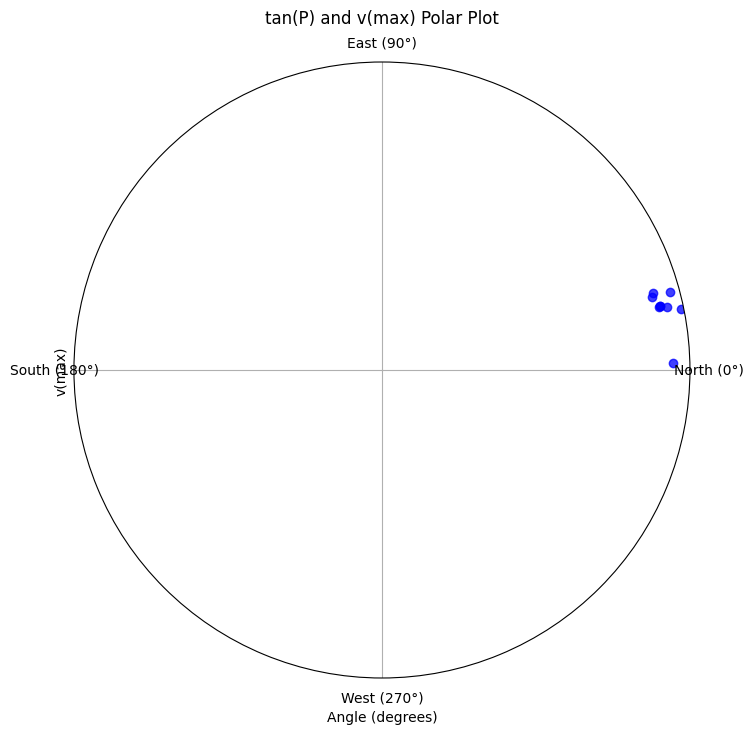

In [183]:
# Load the data with tan(P) and v(max) values
data = pd.read_csv("tanP_vmax_ribose_backbone.csv")

# Convert tan(P) to degrees and calculate the radius
data['Angle (degrees)'] = np.degrees(np.arctan(data['tan(P)']))
data['Angle (degrees)'] = data['Angle (degrees)'] % 360  # Ensure angles are within 0-360 range
data['v(max)'] = data['v(max)']

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot the data
theta = np.radians(data['Angle (degrees)'])
r = data['v(max)']
ax.scatter(theta, r, c='b', label='tan(P) vs. v(max)', alpha=0.75)

# Set the cardinal direction labels
ax.set_xticks(np.radians([0, 90, 180, 270]))
ax.set_xticklabels(['North (0°)', 'East (90°)', 'South (180°)', 'West (270°)'])

# Add axis labels
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('v(max)')

# Set the range for the radius
ax.set_ylim(0, max(r) * 1.1)

# Add grid lines and a title
ax.grid(True)
ax.set_title('tan(P) and v(max) Polar Plot', va='bottom')

# Show the plot
plt.show()


Based on the tan(P) and v(max) values, returns the RNA structure conformation. 

There are two possible conformations:
* C3'-endo is when the C3' carbon is pointing upwards
* C2'-endo is when the C2' carbon is pointing upwards

In [184]:
# Load the data with tan(P) and v(max) values
data = pd.read_csv("tanP_vmax_ribose_backbone.csv")

# Define classification function based on tan(P) and v(max) values
def classify_conformation(row):
    tan_p = row['tan(P)']
    vmax = row['v(max)']
    
    # Set the criteria for classification
    if tan_p > 0 and vmax > threshold_for_C3:
        return "C3'-endo"
    elif tan_p < 0 and vmax <= threshold_for_C2:
        return "C2'-endo"
    else:
        return "Unknown"  # If it doesn't meet either criteria clearly

# Define thresholds (example values, adjust based on your analysis of data or paper)
threshold_for_C3 = 35  # Placeholder, set an appropriate threshold based on paper
threshold_for_C2 = 25  # Placeholder, set an appropriate threshold based on paper

# Apply the classification function to each row
data['Conformation'] = data.apply(classify_conformation, axis=1)

# Display a preview of the results
data[['Residue', 'Chain', 'tan(P)', 'v(max)', 'Conformation']].head()


,Residue,Chain,tan(P),v(max),Conformation
0,1,A,-1.643804,-259.180615,C2'-endo
1,2,A,-1.513361,-262.768583,C2'-endo
2,3,A,-1.522580,-260.303658,C2'-endo
3,4,A,0.230010,-143.147917,Unknown
4,5,A,0.271069,-149.607703,Unknown


In [185]:
# Display the table preview in the notebook
C_endo_preview = data[['Residue', 'Chain', 'tan(P)', 'v(max)', 'Conformation']]
C_endo_preview.head()  # Preview in the notebook

# Save to a CSV file for the full dataset
C_endo_data = "C_endo_data"
data.to_csv(C_endo_data, index=False)

print(f"The ribose backbone conformation data saved to {C_endo_data}")


The ribose backbone conformation data saved to C_endo_data


**Calculation 2:** Calculating the dihedral angles of the phosphate backbone

The angles here is finding hte torison of the backbone and seeing how the structure is bending. No analysis will be conducted based on these numbers. The code is here to get numbers for me. 

In [186]:
# Define sets of purine and pyrimidine residues
# Only assuming RNA nucleotides are present 
purines = {'A', 'G'}
pyrimidines = {'C', 'U'}

# Extract phosphate backbone dihedral angles and X angle for each residue
phosphate_dihedrals_data = []

for model in structure:
    for chain in model:
        residues = list(chain)  # Get residues as a list for easier indexing
        
        for i in range(1, len(residues) - 1):  # Skip first and last for next/previous access
            residue = residues[i]
            try:
                # Define atoms for each dihedral angle (α, β, γ, ε, ζ)                 
                alpha_angle = dihedral(residue["O3'"].coord, residue["P"].coord, residue["O5'"].coord, residue["C5'"].coord)
                beta_angle = dihedral(residue["P"].coord, residue["O5'"].coord, residue["C5'"].coord, residue["C4'"].coord)
                gamma_angle = dihedral(residue["O5'"].coord, residue["C5'"].coord, residue["C4'"].coord, residue["C3'"].coord)
                delta_angle = dihedral(residue["C5'"].coord, residue["C4'"].coord, residue["C3'"].coord, residue["O3'"].coord)
                epsilon_angle = dihedral(residue["C4'"].coord, residue["C3'"].coord, residue["O3'"].coord, residue["P"].coord)
                zeta_angle = dihedral(residue["C3'"].coord, residue["O3'"].coord, residue["P"].coord, residue["O5'"].coord)
                
                # Determine base type and calculate X angle
                res_name = residue.resname.strip()
                if res_name in purines:
                    # X angle for purines: O4' - C1' - N9 - C4
                    p1_x = residue["O4'"].coord
                    p2_x = residue["C1'"].coord
                    p3_x = residue["N9"].coord
                    p4_x = residue["C4"].coord
                    x_angle = dihedral(p1_x, p2_x, p3_x, p4_x)
                elif res_name in pyrimidines:
                    # X angle for pyrimidines: O4' - C1' - N1 - C2
                    p1_x = residue["O4'"].coord
                    p2_x = residue["C1'"].coord
                    p3_x = residue["N1"].coord
                    p4_x = residue["C2"].coord
                    x_angle = dihedral(p1_x, p2_x, p3_x, p4_x)
                else:
                    x_angle = None  # In case residue type is unknown
                
                # Append the results
                phosphate_dihedrals_data.append({
                    "Residue": residue.id[1],
                    "Chain": chain.id,
                    "α": alpha_angle,
                    "β": beta_angle,
                    "γ": gamma_angle,
                    "δ": delta_angle,
                    "ε": epsilon_angle,
                    "ζ": zeta_angle,
                    "X angle": x_angle,
                    "X type": "Purine" if res_name in purines else "Pyrimidine"
                })
                
            except KeyError:
                # Skip residues missing any required atoms for these calculations
                continue


# Convert to DataFrame and display a preview
phosphate_dihedrals_df = pd.DataFrame(phosphate_dihedrals_data)
phosphate_dihedrals_df.head()  # Display the first few rows to preview


,Residue,Chain,α,β,γ,δ,ε,ζ,X angle,X type
0,2,A,-96.473694,9.119303,-134.744019,-97.309593,105.271408,-167.086975,23.511017,Purine
1,3,A,-126.224960,10.976104,-104.146523,-103.611679,117.888786,-162.945816,17.711893,Pyrimidine
2,4,A,-149.167694,-44.939854,-115.517723,-111.230278,122.211418,127.283150,14.615124,Purine
3,5,A,-117.104691,-3.247308,-104.208626,-108.627945,117.256859,-159.227676,7.412841,Purine
4,6,A,-78.128265,-22.776951,-135.045944,-101.050926,113.815811,-165.059280,28.963881,Purine


In [187]:
# Save the complete data to a CSV file
csv_file_path = "phosphate_backbone_dihedrals_with_x_angle.csv"
phosphate_dihedrals_df.to_csv(csv_file_path, index=False)

print(f"Phosphate backbone dihedral angles and X angle data saved to {csv_file_path}")


Phosphate backbone dihedral angles and X angle data saved to phosphate_backbone_dihedrals_with_x_angle.csv


Combining all of the data into one single CSV file. 

In [190]:
# Load individual CSV files
C_endo_data_df = pd.read_csv("C_endo_data")
phosphate_dihedrals_df = pd.read_csv("phosphate_backbone_dihedrals_with_x_angle.csv")

# Merge the dataframes on common columns ('Residue' and 'Chain')
combined_df = C_endo_data_df.merge(phosphate_dihedrals_df, on=['Residue', 'Chain'], how='outer')

# Save the combined data to a new CSV file
combined_csv_file = "combined_rna_structure_data.csv"
combined_df.to_csv(combined_csv_file, index=False)

print(f"Combined data saved to {combined_csv_file}")


Combined data saved to combined_rna_structure_data.csv
